In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [11]:
# load the dataset
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
data = pd.read_csv('EEG_Eye_State_no_outliers.csv', header=None)
data.columns = column_list

In [18]:

imp_feat = ['F7','O2','FC6']
data = data.drop(columns=imp_feat)

In [19]:
data.head()

,AF3,F3,FC5,T7,P7,O1,P8,T8,F4,F8,AF4,class
0,4329.23,4289.23,4148.21,4350.26,4586.15,4096.92,4222.05,4238.46,4280.51,4635.90,4393.85,0.0
1,4324.62,4293.85,4148.72,4342.05,4586.67,4097.44,4210.77,4226.67,4279.49,4632.82,4384.10,0.0
2,4327.69,4295.38,4156.41,4336.92,4583.59,4096.92,4207.69,4222.05,4282.05,4628.72,4389.23,0.0
3,4328.72,4296.41,4155.90,4343.59,4582.56,4097.44,4217.44,4235.38,4287.69,4632.31,4396.41,0.0
4,4326.15,4292.31,4151.28,4347.69,4586.67,4095.90,4210.77,4244.10,4288.21,4632.82,4398.46,0.0


In [13]:
print("dimension of data: {}".format(data.shape))

dimension of data: (14304, 15)


In [14]:
print(data.groupby('class').size())

class
0.0    7855
1.0    6449
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14304 non-null  float64
 1   F7      14304 non-null  float64
 2   F3      14304 non-null  float64
 3   FC5     14304 non-null  float64
 4   T7      14304 non-null  float64
 5   P7      14304 non-null  float64
 6   O1      14304 non-null  float64
 7   O2      14304 non-null  float64
 8   P8      14304 non-null  float64
 9   T8      14304 non-null  float64
 10  FC6     14304 non-null  float64
 11  F4      14304 non-null  float64
 12  F8      14304 non-null  float64
 13  AF4     14304 non-null  float64
 14  class   14304 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23ede29390>,
      dtype=object)

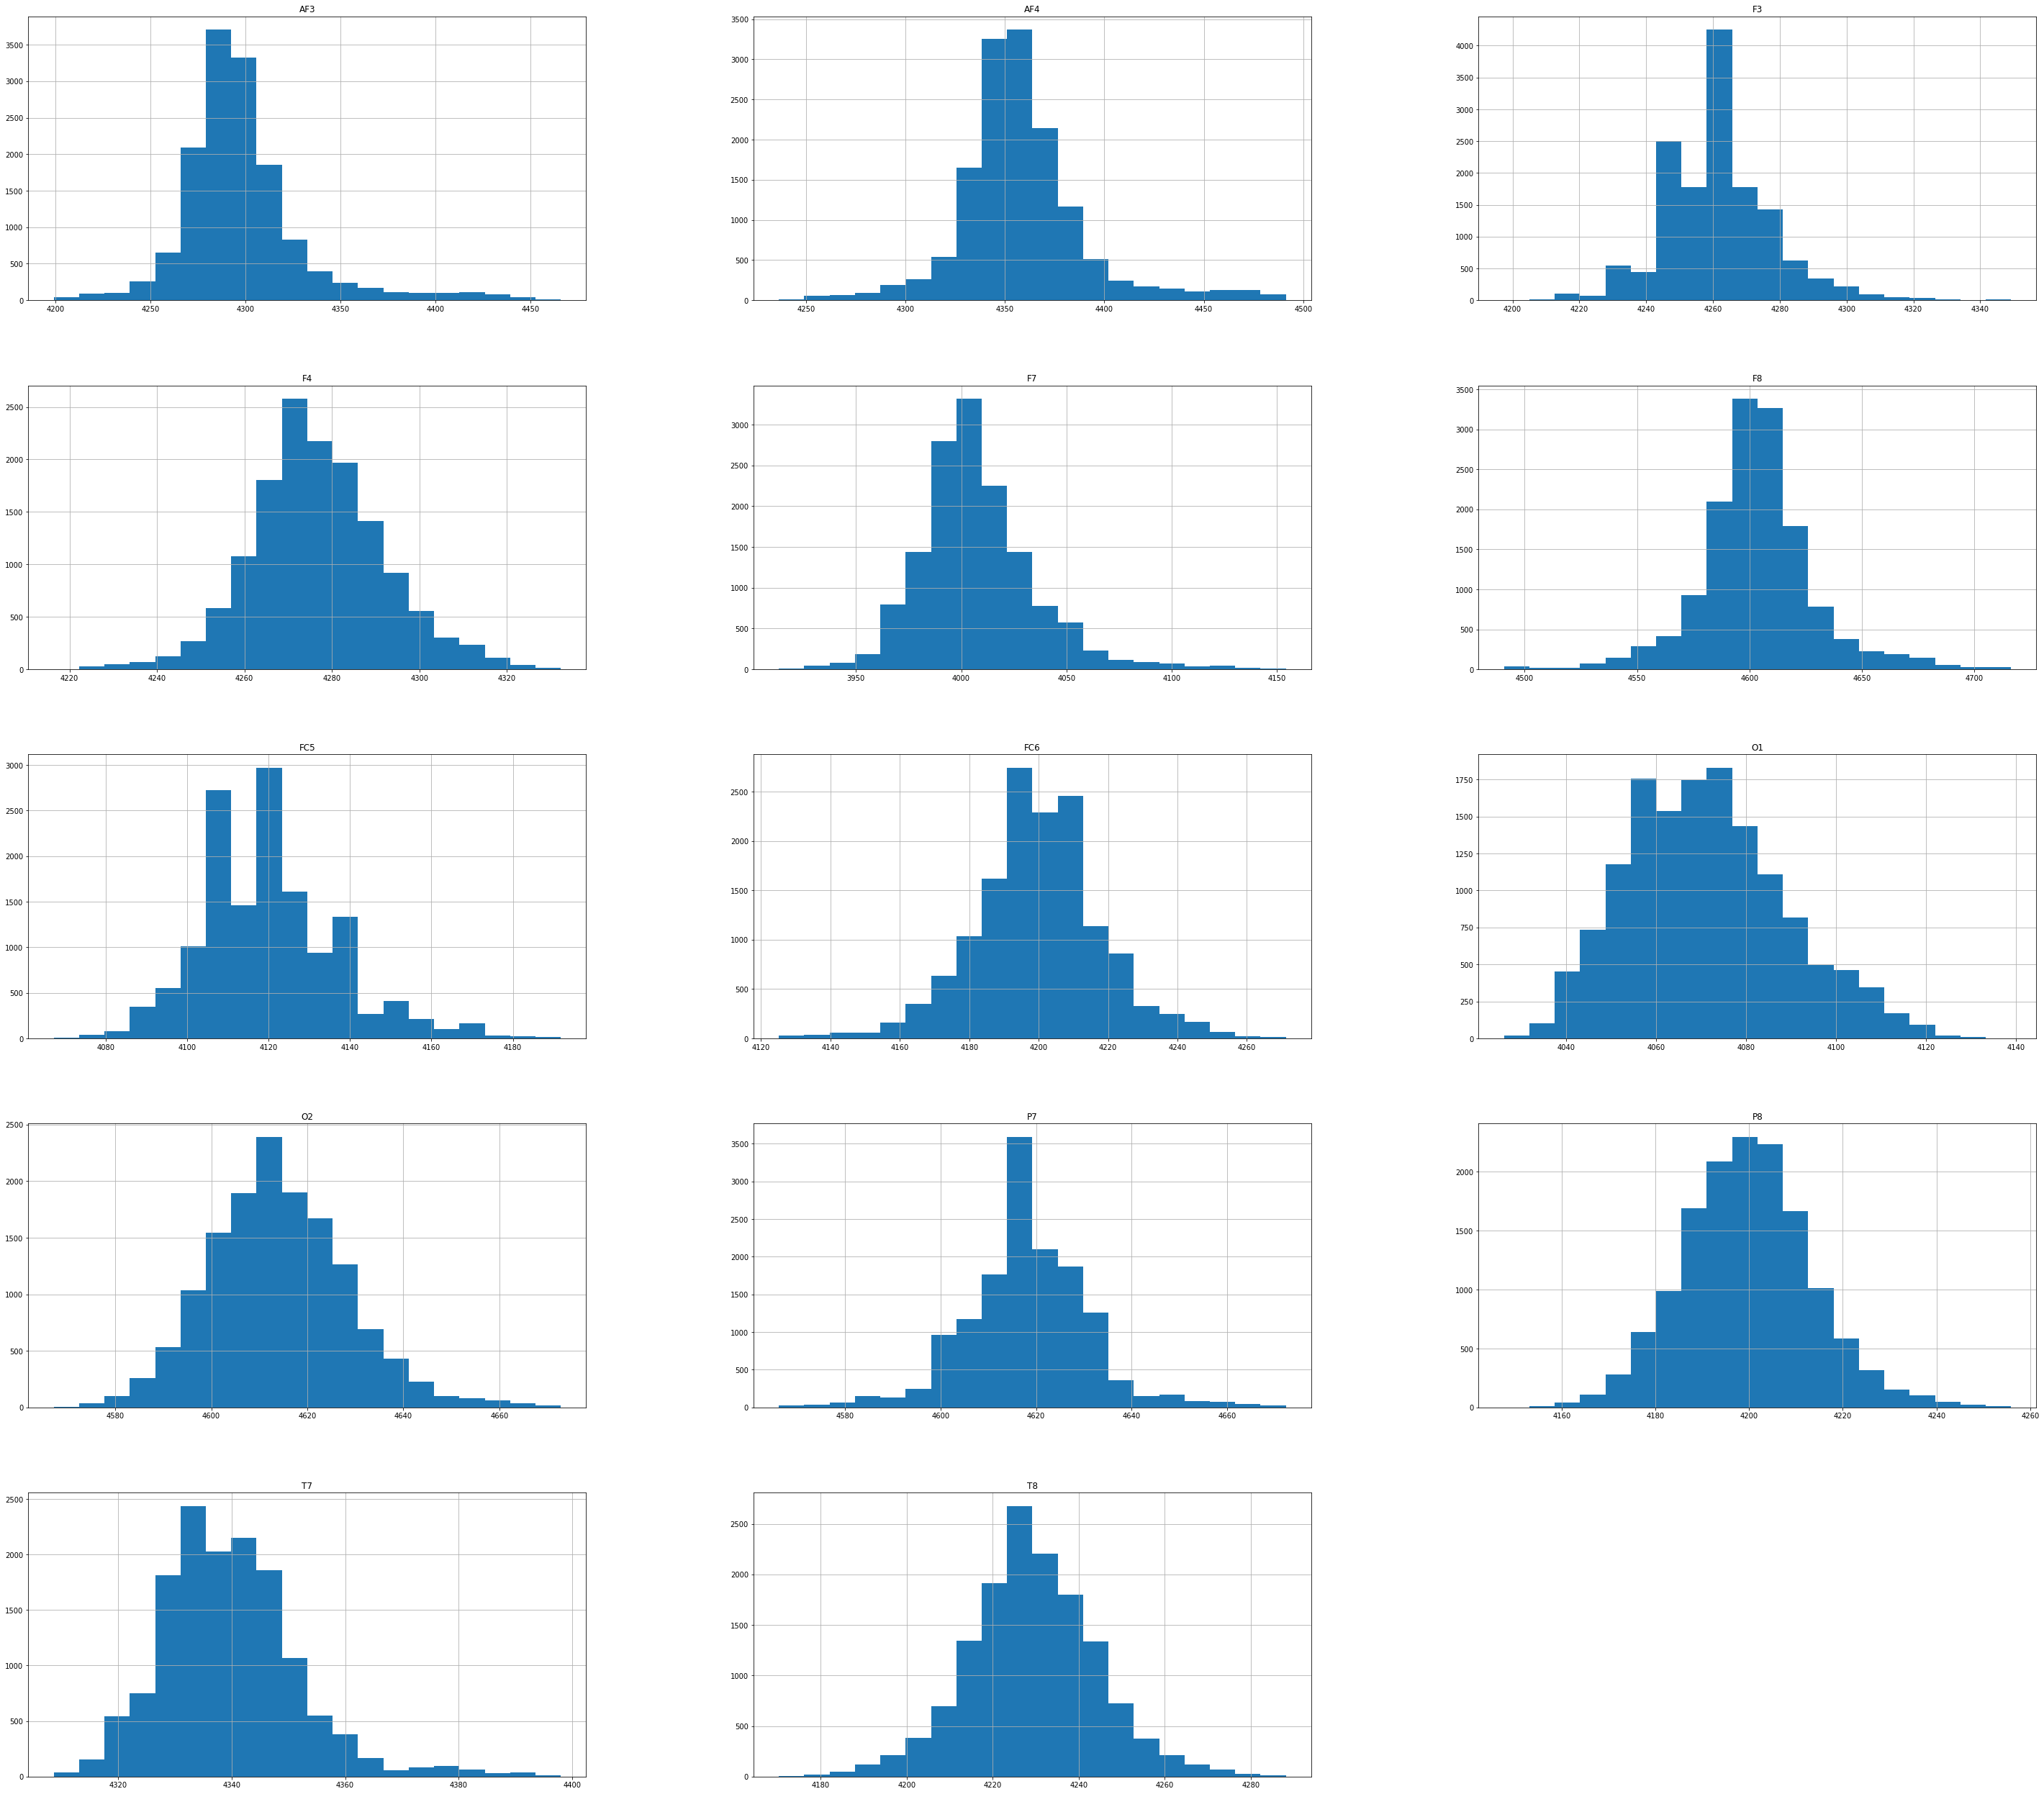

In [7]:
data[feat_list].hist(bins=20,layout=(5, 3), figsize=(50, 45))

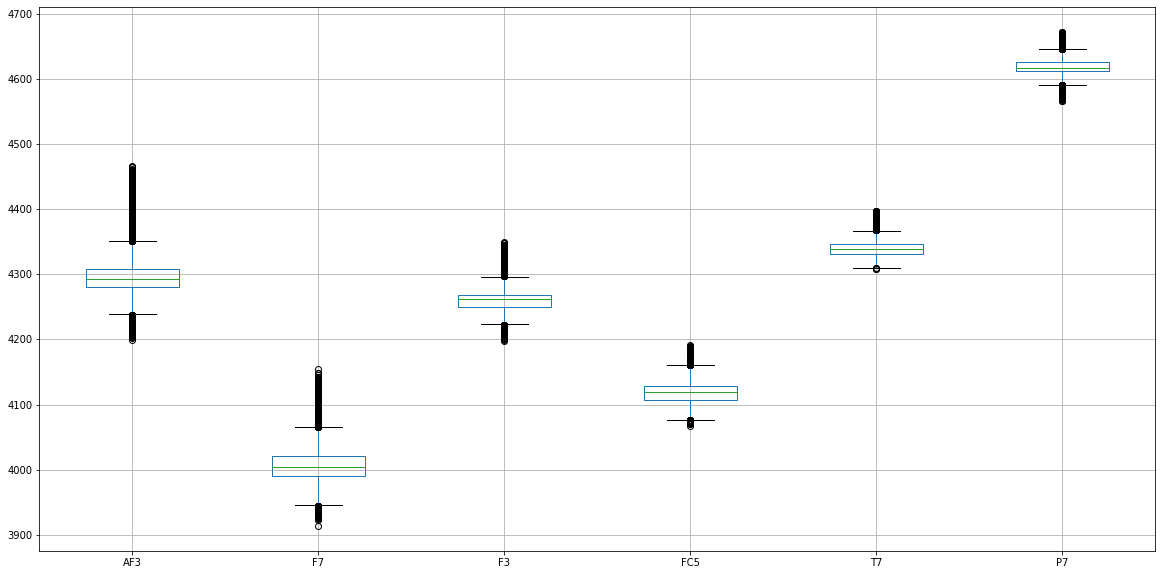

In [8]:
plt.figure(figsize=(20,10))
boxplot = data.boxplot(column=feat_list[0:6])

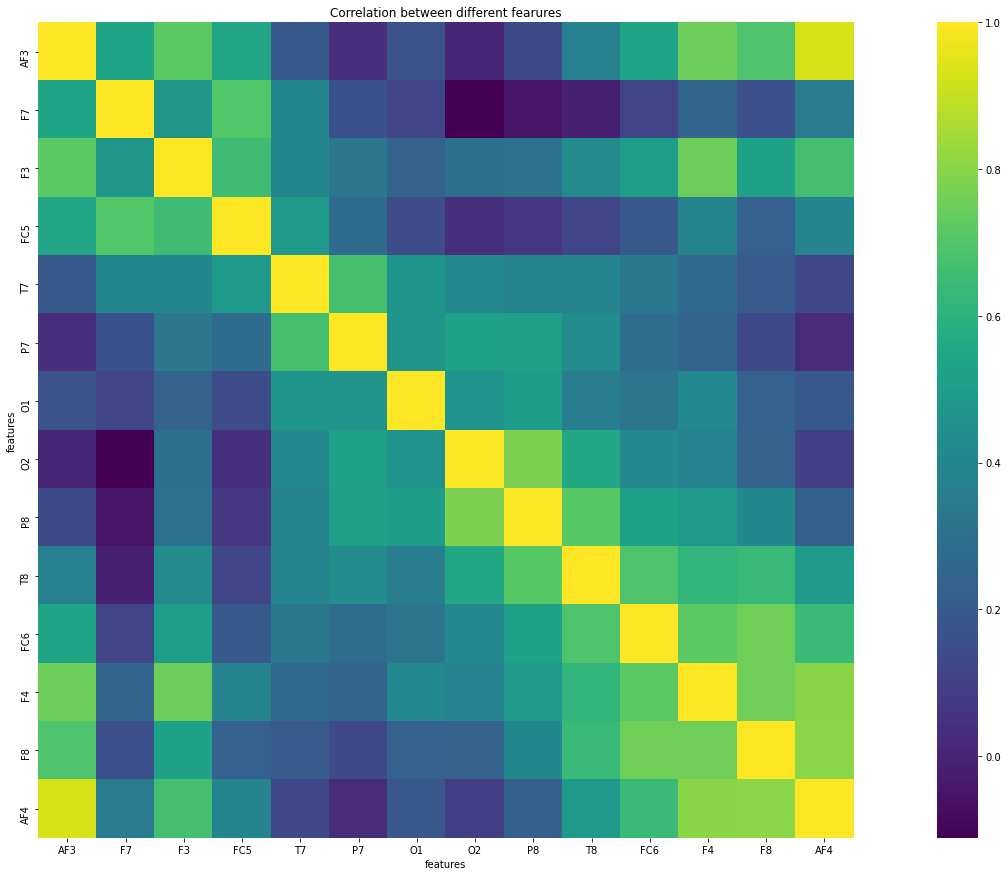

In [9]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.xlabel('features')
    plt.ylabel('features')
    plt.savefig('cor1.png')
    plt.show();

#print("After Dropping: ", cleandf)
correlation_heatmap(data[feat_list], 30,15)

It is clear that there are less features that are correlated to each other and moreover, they are correlated around 0.8-0.9, remaining all are correlated less than 0.0-0.6

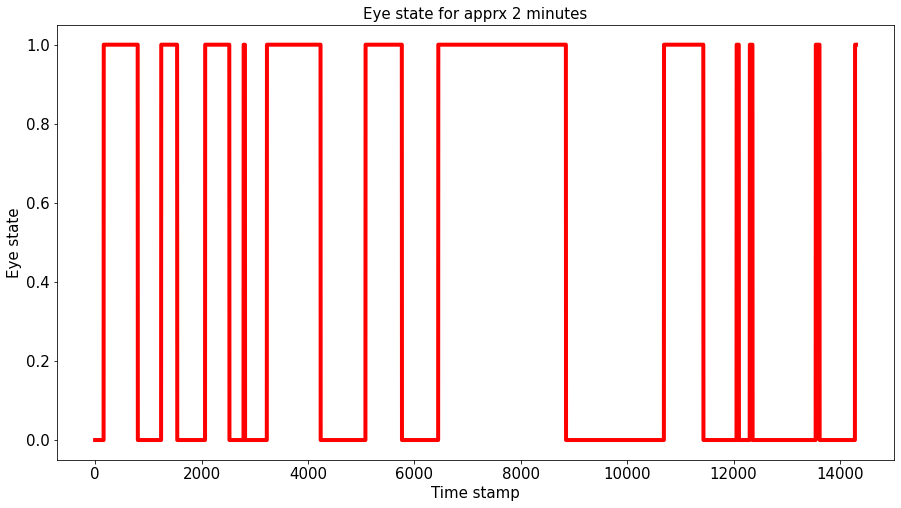

In [10]:
plt.figure(figsize=(15,8))
data['class'].plot(linestyle='solid',color='red',linewidth=4)
plt.title('Eye state for apprx 2 minutes',size='15')
plt.xlabel('Time stamp',size='15')
plt.ylabel('Eye state',size='15')
plt.xticks(size='15')
plt.yticks(size='15')
plt.show()

In [11]:
correlation = data.corr()
eigen_vals, eigen_vecs = np.linalg.eigh(correlation)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.0370309  0.11736665 0.14574082 0.16513715 0.2131227  0.23141719
 0.27373483 0.3138668  0.40773111 0.56495192 0.6532737  0.93695845
 1.9750252  2.6280298  6.33661279]


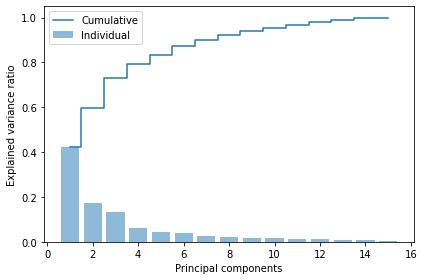

In [12]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pcao.png')
plt.show()

In [13]:
cum_var_exp

array([0.42244085, 0.59764284, 0.72931119, 0.79177508, 0.83532666,
       0.87299012, 0.9001722 , 0.92109665, 0.93934564, 0.95477345,
       0.96898163, 0.97999078, 0.98970683, 0.99753127, 1.        ])

In [20]:
X = data.drop('class', 1)
y = data['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape

(11443, 10)

In [22]:
svc = SVC(kernel='rbf',C=50,gamma='auto',probability=True)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.93


In [23]:
def roc_calc(model,X_test,y_test,name):
    pred_prob = svc.predict_proba(X_test)
    # auc scores
    auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
    print('accuracy score is: ' + str(auc_score1))
    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    plt.savefig('roc'+str(name) + '.png')
    plt.show();

accuracy score is: 0.9786062235904333


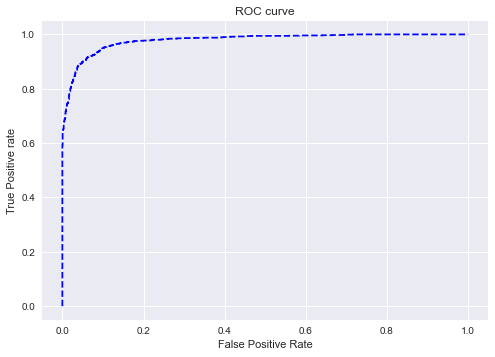

In [24]:
roc_calc(svc,X_test,y_test,"outsvmc100")

Precision  0.93
Recall 0.91


<Figure size 576x396 with 0 Axes>

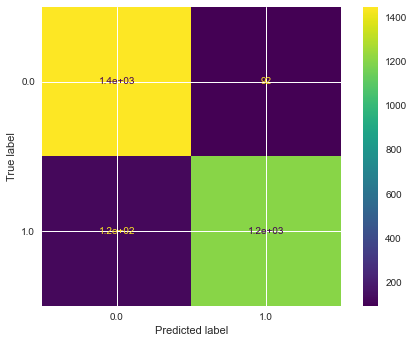

In [25]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.savefig('cmoutsvmc100.png')
plt.show()

### Data splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data['class'], stratify=data['class'], random_state=66)

In [27]:
X_train.shape, X_test.shape

((10728, 11), (3576, 11))

## LDA

In [28]:
#this


ldam=LinearDiscriminantAnalysis()
ldam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(ldam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ldam.score(X_test, y_test)))

Accuracy on training set: 0.63
Accuracy on test set: 0.63


## QDA

In [29]:
#this


qdam=QuadraticDiscriminantAnalysis()
qdam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(qdam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(qdam.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.76


### Support Vector Machine

In [30]:
svc = SVC(kernel='rbf',C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.61
Accuracy on test set: 0.61


In [31]:
svc = SVC(kernel='poly',degree=3,C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.65
Accuracy on test set: 0.64


### Neural Networks

In [263]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.91


/home/rohith/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

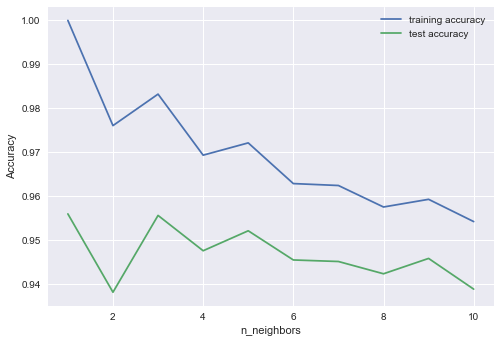

In [264]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [265]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

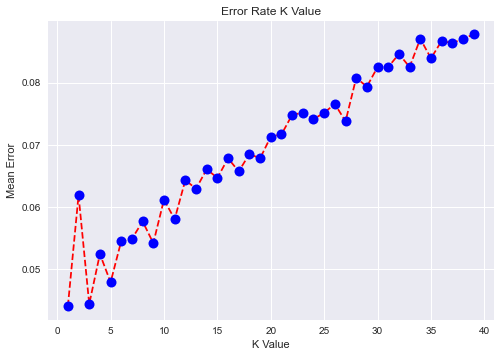

In [266]:
plt.figure()
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [8]:
#this

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.97


Precision  0.97
Recall 0.97


<Figure size 432x288 with 0 Axes>

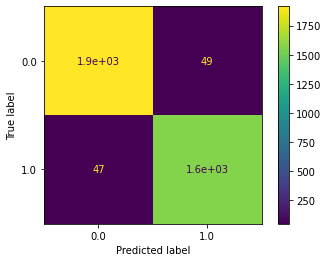

In [9]:
prediction=knn.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('knn.png')
plt.show()

### Logistic Regression

One of the most common linear classification algorithms is logistic regression. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm.

In [269]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.634
Test set score: 0.625


Precision  0.63
Recall 0.46


<Figure size 576x396 with 0 Axes>

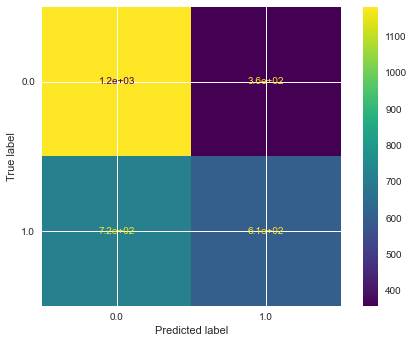

In [270]:
prediction=logreg.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

### Decision Tree

In [271]:
tree = DecisionTreeClassifier(max_depth=20,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.802


Precision  0.79
Recall 0.78


<Figure size 576x396 with 0 Axes>

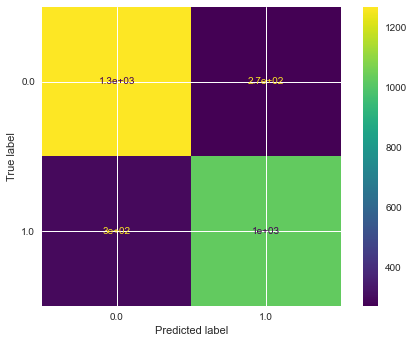

In [272]:
prediction=tree.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

### Random Forest

In [273]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.905


Precision  0.93
Recall 0.86


<Figure size 576x396 with 0 Axes>

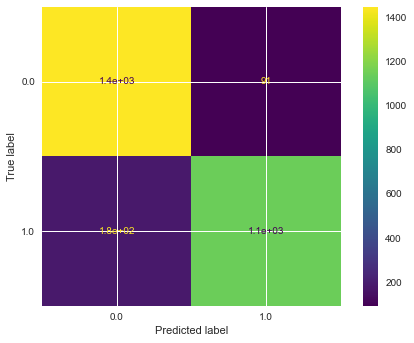

In [274]:
prediction=rf.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

### Gradient Boosting

In [16]:
gb = GradientBoostingClassifier(random_state=0,max_depth=10, learning_rate=0.1)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.933


Precision  0.95
Recall 0.90


<Figure size 432x288 with 0 Axes>

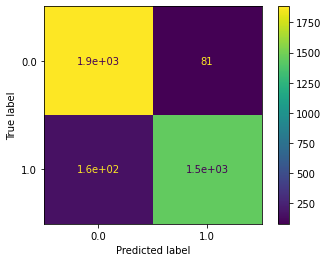

In [17]:
prediction=gb.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(gb, X_test, y_test)
plt.savefig('gb.png')
plt.show()

In [15]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

In [16]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [17]:
#X = data[feat_list].values
#y = data['class'].values

model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

y_cat = to_categorical( y_train.values)
history = model.fit(X_train, y_cat, verbose=0, epochs=20)

In [18]:
model.predict_classes(X_test)
acc = history.history['accuracy'][-1]

In [19]:
print("Accuracy on test set: {:.3f}".format(acc))

Accuracy on test set: 0.959


In [26]:
prediction=model.predict_classes(X_test)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))


Precision  0.94
Recall 0.90
